This based off of the tutorial from scanpy using pbmc 3K.
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

And heavily influenced by https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17.ipynb

We are interesting in doing 1month vs 30month, male kidney

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.8.1 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


## Open files

In [2]:
data_path = f"{os.getcwd()}/../../data/single_cell_data/covid/"

# file downloaded from SeuratData then converted to h5ad 

in_file = f"{data_path}/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad"
results_file = f"{data_path}/covid_processed.h5ad"

adata = sc.read_h5ad(in_file)
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`



In [3]:
adata.var

Selected  sct_detection_rate  sct_gmean  sct_residual_mean  \
5S-rRNA               0.0            0.000261   0.000189           0.000651   
7SK                   0.0            0.027394   0.020371           0.005464   
A1BG                  0.0            0.001785   0.001268           0.002331   
A1BG-AS1              0.0            0.000501   0.000356           0.001971   
A1CF                  0.0            0.001324   0.000942           0.002839   
...                   ...                 ...        ...                ...   
UGT2B17               0.0            0.001163   0.000859          -0.001669   
Vault                 0.0            0.000201   0.000139          -0.002708   
XX-CR54.1             0.0            0.000221   0.000153          -0.002593   
XXbac-B135H6.18       0.0            0.000983   0.000706           0.000535   
ZBTB40-IT1            0.0            0.000221   0.000153          -0.001845   

                 sct_residual_variance  sct_variable  sct_variance  
5S-rRNA                       1.164300             0      0.000321  
7SK                           1.062872             0      0.035997  
A1BG                          1.063613             0      0.002062  
A1BG-AS1                      1.150165             0      0.000561  
A1CF                          1.158183             0      0.001502  
...                                ...           ...           ...  
UGT2B17                       0.938646             0      0.001663  
Vault                         0.750773             0      0.000201  
XX-CR54.1                     0.731583             0      0.000221  
XXbac-B135H6.18               1.047113             0      0.001162  
ZBTB40-IT1                    0.819593             0      0.000221  

[26361 rows x 7 columns]

In [4]:
adata.obs

Admission ClusterID  DPS  DTF Donor_full      HLA1      IFN1  \
covid_555_1.1       ICU        13    9    9       C1 A -0.026053  0.015625   
covid_555_1.2       ICU        10    9    9       C1 A  0.023525 -0.000322   
covid_555_1.3       ICU        19    9    9       C1 A -0.044271  0.086385   
covid_555_1.7       ICU        10    9    9       C1 A -0.038040  0.022590   
covid_555_1.8       ICU        22    9    9       C1 A -0.043605  0.010739   
...                 ...       ...  ...  ...        ...       ...       ...   
HIP045.2543         N/A         7    0    0         H6  0.588374  0.092001   
HIP045.2544         N/A        21    0    0         H6  1.295145  0.045697   
HIP045.2545         N/A        21    0    0         H6  0.892457  0.062819   
HIP045.2546         N/A        11    0    0         H6  0.020954  0.036953   
HIP045.2547         N/A        24    0    0         H6 -0.135973  0.024061   

              Sex   Status Ventilated  ... nCount_RNA nCount_SCT  \
covid_555_1.1   M    COVID    NonVent  ...     1222.0     1682.0   
covid_555_1.2   M    COVID    NonVent  ...     1099.0     1700.0   
covid_555_1.3   M    COVID    NonVent  ...     1055.0     1661.0   
covid_555_1.7   M    COVID    NonVent  ...     2411.0     1971.0   
covid_555_1.8   M    COVID    NonVent  ...     2276.0     1948.0   
...            ..      ...        ...  ...        ...        ...   
HIP045.2543     M  Healthy    Healthy  ...     6103.0     1959.0   
HIP045.2544     M  Healthy    Healthy  ...     7324.0     2088.0   
HIP045.2545     M  Healthy    Healthy  ...     6368.0     1929.0   
HIP045.2546     M  Healthy    Healthy  ...     6669.0     1918.0   
HIP045.2547     M  Healthy    Healthy  ...     8990.0     2283.0   

               nFeature_RNA  nFeature_SCT  percent_mt  percent_rpl  \
covid_555_1.1           125           126    1.309329     0.245499   
covid_555_1.2           160           160   13.102820     0.363967   
covid_555_1.3           212           213    2.938389     0.947867   
covid_555_1.7           312           312   10.908337     0.165906   
covid_555_1.8           336           336   11.203866     0.307557   
...                     ...           ...         ...          ...   
HIP045.2543            2460          1080    6.898247     3.637555   
HIP045.2544            2488          1031    6.485527     6.157837   
HIP045.2545            2511          1021    4.742462     6.171483   
HIP045.2546            2650          1063    4.573400     3.328835   
HIP045.2547            2734          1013    3.459399     4.226919   

               percent_rps  percent_rrna  seurat_clusters       singler  
covid_555_1.1     0.081833     46.644844               12  Erythroblast  
covid_555_1.2     0.363967     58.780708                9        B_cell  
covid_555_1.3     0.663507     55.829384               18        B_cell  
covid_555_1.7     0.041477     67.399422                9        B_cell  
covid_555_1.8     0.263620     67.355011               21        B_cell  
...                    ...           ...              ...           ...  
HIP045.2543       2.867442     10.797968                6      Monocyte  
HIP045.2544       4.929000     12.738940               20      Monocyte  
HIP045.2545       4.978015     14.400126               20       T_cells  
HIP045.2546       2.998950     14.574899               10      Monocyte  
HIP045.2547       3.359288     13.348165               23       T_cells  

[44721 rows x 22 columns]

In [5]:
# how many of each mouse
adata.obs["Donor_full"].value_counts()

C3      6545
H4      5136
C1 B    5006
C4      3688
C7      3364
C1 A    3356
H5      3146
C5      2507
H3      2306
H1      2100
H6      1998
H2      1941
C6      1893
C2      1735
Name: Donor_full, dtype: int64

## check number of cells per sample of interest

In [6]:
# how many of each cell
adata.obs.seurat_clusters.value_counts()

0     5791
1     5440
2     4098
3     4057
4     3840
5     3681
6     2637
7     2206
8     1439
9     1341
10    1258
11    1066
12     777
13     697
14     660
15     625
16     621
17     527
18     486
19     459
20     456
21     449
22     448
23     423
24     324
25     301
26     234
27     206
28      90
29      84
Name: seurat_clusters, dtype: int64

## Preprocessing

In [7]:
# merge them
cell_dict = {'B': ["5", "9"],
             'CD14_monocyte': ["3", "6", "7", "8"],
             'CD16_monocyte': ["10","28"],
             'CD4_T': ["2", "4", "19"], 
             'CD8_T': ["1", "13", "15"], 
             'DC': ["20"], 
             'Granulocyte': ["24","25","27"],
             'NK': ["0", "11"],
             'PB': ["16", "18", "21", "23", "29"], 
             'Platelet': ["17"], 
             'RBC': ["12", "14"],
             'gdT':["22"],
             'pDC': ["26"]}

# Initialize empty column in cell metadata
adata.obs['names_merged'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.seurat_clusters).isin(cell_dict[i])
    adata.obs.loc[ind,'names_merged'] = i

adata.obs.names_merged.value_counts()

CD14_monocyte    10339
CD4_T             8397
NK                6857
CD8_T             6762
B                 5022
PB                2063
RBC               1437
CD16_monocyte     1348
Granulocyte        831
Platelet           527
DC                 456
gdT                448
pDC                234
Name: names_merged, dtype: int64

In [8]:
# we are going to combine a few cell types
tab = adata.obs.groupby(['seurat_clusters', 'names_merged']).size()

tab.unstack()

names_merged        B  CD14_monocyte  CD16_monocyte  CD4_T  CD8_T   DC  \
seurat_clusters                                                          
0                   0              0              0      0      0    0   
1                   0              0              0      0   5440    0   
2                   0              0              0   4098      0    0   
3                   0           4057              0      0      0    0   
4                   0              0              0   3840      0    0   
5                3681              0              0      0      0    0   
6                   0           2637              0      0      0    0   
7                   0           2206              0      0      0    0   
8                   0           1439              0      0      0    0   
9                1341              0              0      0      0    0   
10                  0              0           1258      0      0    0   
11                  0              0              0      0      0    0   
12                  0              0              0      0      0    0   
13                  0              0              0      0    697    0   
14                  0              0              0      0      0    0   
15                  0              0              0      0    625    0   
16                  0              0              0      0      0    0   
17                  0              0              0      0      0    0   
18                  0              0              0      0      0    0   
19                  0              0              0    459      0    0   
20                  0              0              0      0      0  456   
21                  0              0              0      0      0    0   
22                  0              0              0      0      0    0   
23                  0              0              0      0      0    0   
24                  0              0              0      0      0    0   
25                  0              0              0      0      0    0   
26                  0              0              0      0      0    0   
27                  0              0              0      0      0    0   
28                  0              0             90      0      0    0   
29                  0              0              0      0      0    0   

names_merged     Granulocyte    NK   PB  Platelet  RBC  gdT  pDC  
seurat_clusters                                                   
0                          0  5791    0         0    0    0    0  
1                          0     0    0         0    0    0    0  
2                          0     0    0         0    0    0    0  
3                          0     0    0         0    0    0    0  
4                          0     0    0         0    0    0    0  
5                          0     0    0         0    0    0    0  
6                          0     0    0         0    0    0    0  
7                          0     0    0         0    0    0    0  
8                          0     0    0         0    0    0    0  
9                          0     0    0         0    0    0    0  
10                         0     0    0         0    0    0    0  
11                         0  1066    0         0    0    0    0  
12                         0     0    0         0  777    0    0  
13                         0     0    0         0    0    0    0  
14                         0     0    0         0  660    0    0  
15                         0     0    0         0    0    0    0  
16                         0     0  621         0    0    0    0  
17                         0     0    0       527    0    0    0  
18                         0     0  486         0    0    0    0  
19                         0     0    0         0    0    0    0  
20                         0     0    0         0    0    0    0  
21                         0     0  449         0    0    0    0  
22                     

normalizing counts per cell
    finished (0:00:04)


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


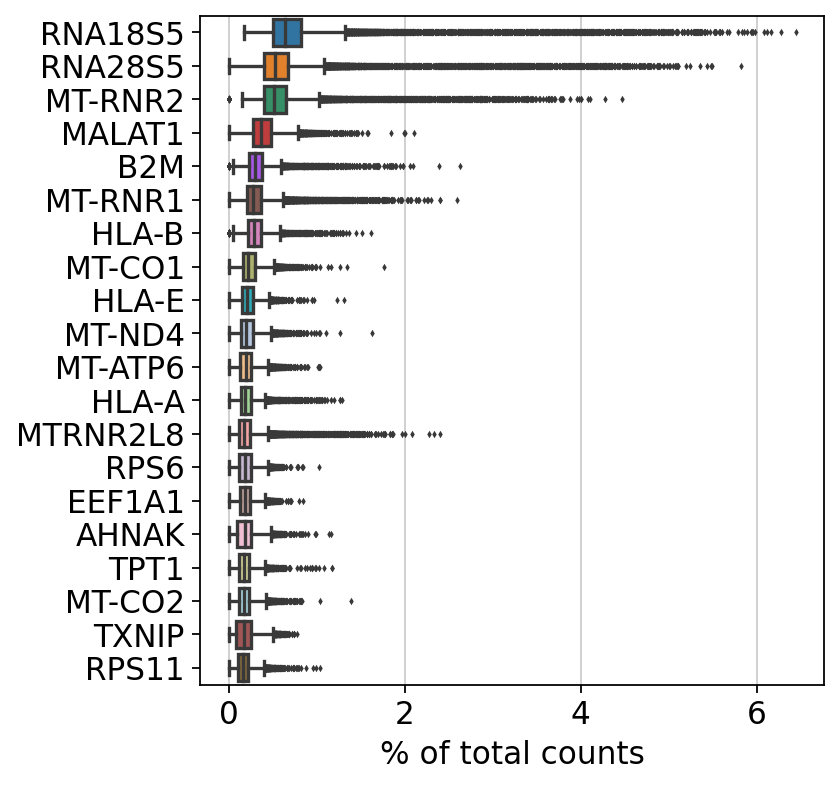

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [10]:
# filter out cells with less than 200 genes and genes expressed in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


filtered out 580 cells that have less than 200 genes expressed


In [11]:
# we are going to combine a few cell types
tab = adata.obs.groupby(['Donor_full', 'names_merged']).size()

tab.unstack()

names_merged     B  CD14_monocyte  CD16_monocyte  CD4_T  CD8_T  DC  \
Donor_full                                                           
C1 A           186           1561             29    326    563  16   
C1 B           418           1858             48    627    904  17   
C2             419            217              2    528    176   3   
C3             551           1102             16   2402   1437  22   
C4            1076            713             29    384    432  38   
C5              98            462             13    899    183  60   
C6              17            277              7    285     80   4   
C7             260           2095            289    111    102  92   
H1             185            680            149    206    263  37   
H2             296            325             76    201    633  32   
H3             289            215             33    704    526  18   
H4             547            166            202    451    624  33   
H5             487            444            403    781    257  52   
H6             190            224             52    492    582  32   

names_merged  Granulocyte    NK   PB  Platelet  RBC  gdT  pDC  
Donor_full                                                     
C1 A                   43   354  162        56   36    4   18  
C1 B                  173   387  483        43   16   13   15  
C2                     11   271   75        20    3    3    0  
C3                     97   328  312       131  115    6   10  
C4                    100   104  733        46    8    1   23  
C5                     22   518  146        96    0    3    7  
C6                     96    58   36         1  486    0    6  
C7                    128   130   29        71   27   15   13  
H1                     54   444    5         6   35   10   26  
H2                     23   222    2        27    9   61   29  
H3                     25   261    9        10   13  188   14  
H4                     13  2972   41         5    3   49   30  
H5                     27   593   24        13   14   25   26  
H6                     19   215    5         2   96   70   17

In [12]:
# is there a big diferences in cell types present in covid vs healthy
tab = adata.obs.groupby(['names_merged', 'Status']).size()

tab.unstack()

# it seems to be from certain outlier samples they have many more in covid than in healthy

Status         COVID  Healthy
names_merged                 
B               3025     1994
CD14_monocyte   8285     2054
CD16_monocyte    433      915
CD4_T           5562     2835
CD8_T           3877     2885
DC               252      204
Granulocyte      670      161
NK              2150     4707
PB              1976       86
Platelet         464       63
RBC              691      170
gdT               45      403
pDC               92      142

In [13]:
adata.var_names[np.where(adata.var_names.str.startswith('MT'))]

Index(['MT-ATP6', 'MT-ATP8', 'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-CYB', 'MT-ND1',
       'MT-ND2', 'MT-ND3', 'MT-ND4',
       ...
       'MTSS1L', 'MTTP', 'MTURN', 'MTUS1', 'MTUS2', 'MTUS2-AS1', 'MTUS2-AS2',
       'MTX1', 'MTX2', 'MTX3'],
      dtype='object', length=122)

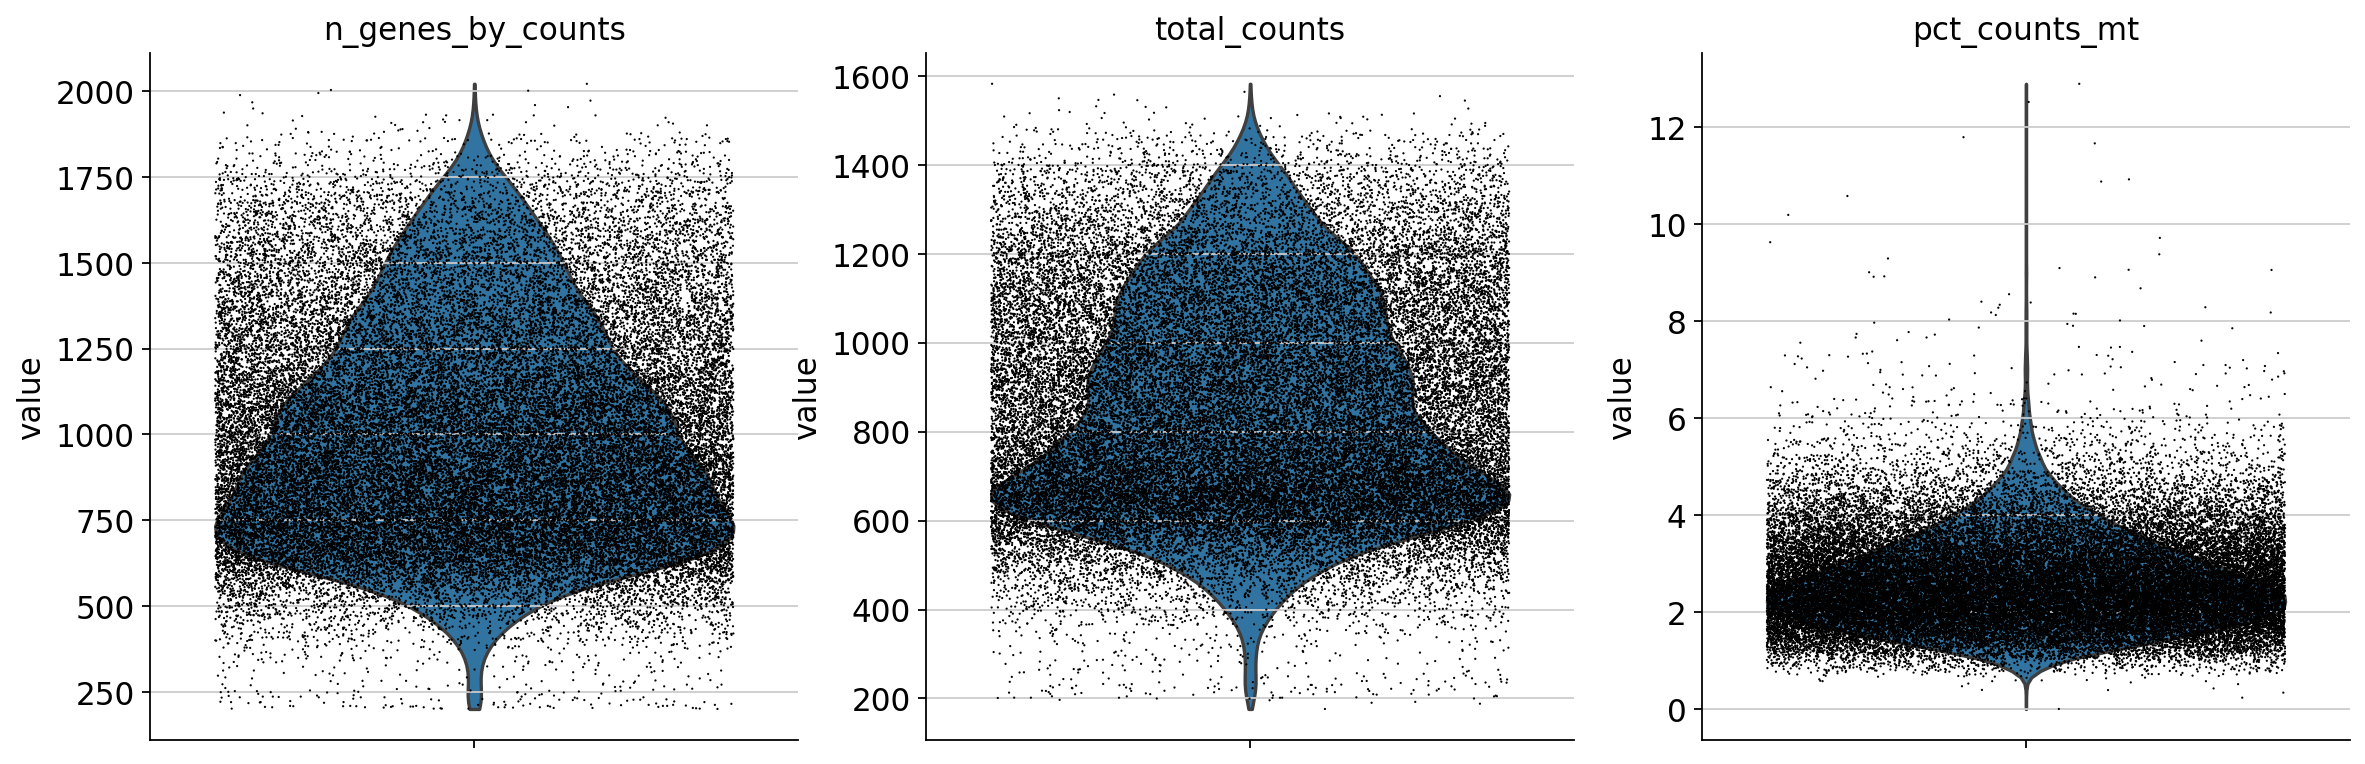

In [14]:
# remove genes with high mitochondrial content
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

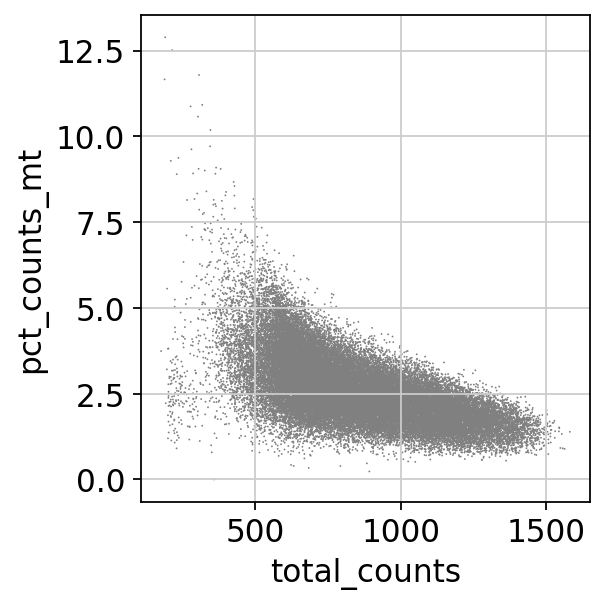

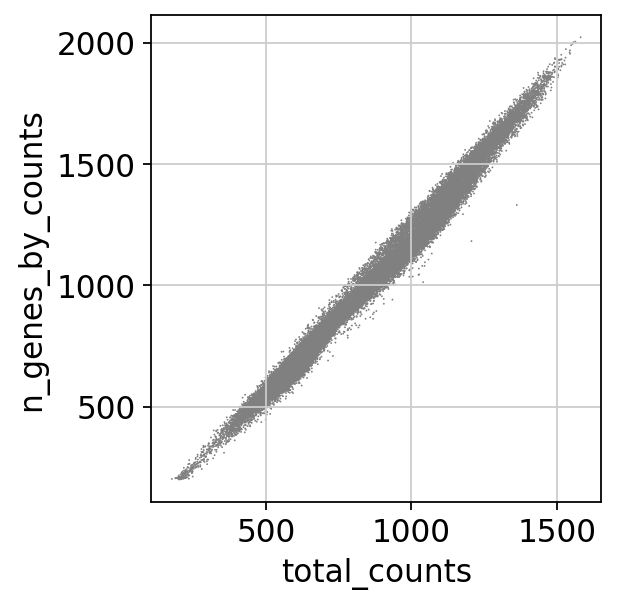

In [15]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [16]:
# slice the data based on the plots from above
# remove cells with more than 9000 genes
# remove cells with more than 7.5% MTgenes
# we are only removing by mt
adata = adata[adata.obs.n_genes_by_counts < 9000, :]
adata = adata[adata.obs.pct_counts_mt < 7.5, :]

In [17]:
results_file

'/beevol/home/davidson/checkouts/sc_bulk_ood/sc_preprocessing/0_qc_notebooks/../../data/single_cell_data/covid//covid_processed.h5ad'

In [18]:
# write it out before normalization
del adata.raw
adata.write(results_file)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:15)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


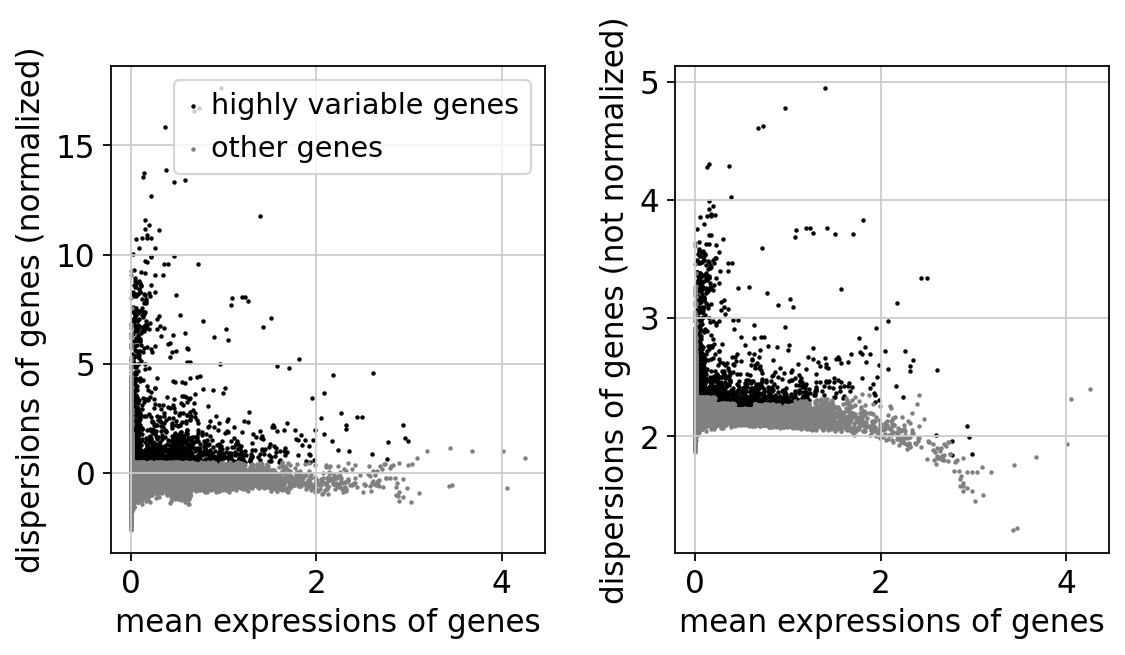

In [ ]:
# normalize to 10K counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# log data
sc.pp.log1p(adata)

# get high variance genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# and plot
sc.pl.highly_variable_genes(adata)

# now store the raw version of the data for our use later
adata.raw = adata


In [ ]:
# now process the counts further for doing DE 
# analysis and the cell clustering
adata = adata[:, adata.var.highly_variable]

# regress out the signal
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

# scale the genes
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:01:55)


## PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


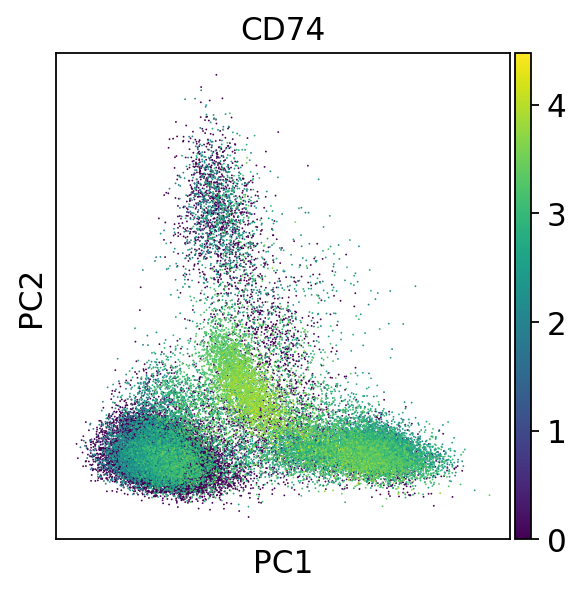

In [ ]:
sc.tl.pca(adata, n_comps=50)
sc.pl.pca(adata, color='CD74')


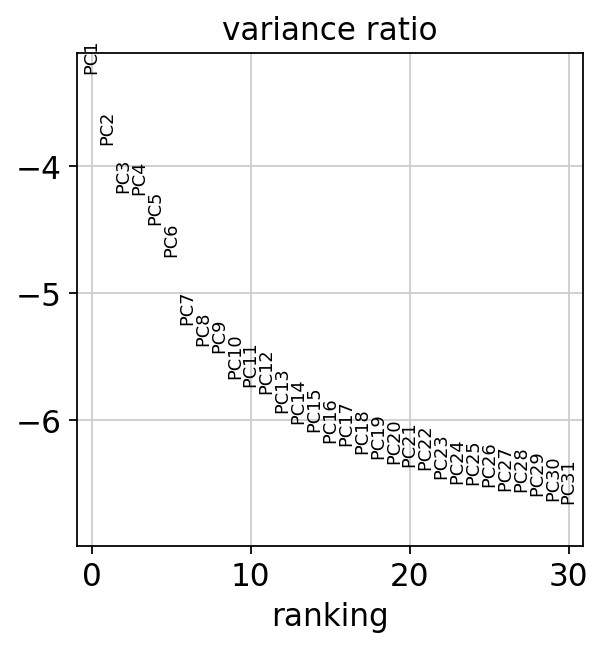

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)


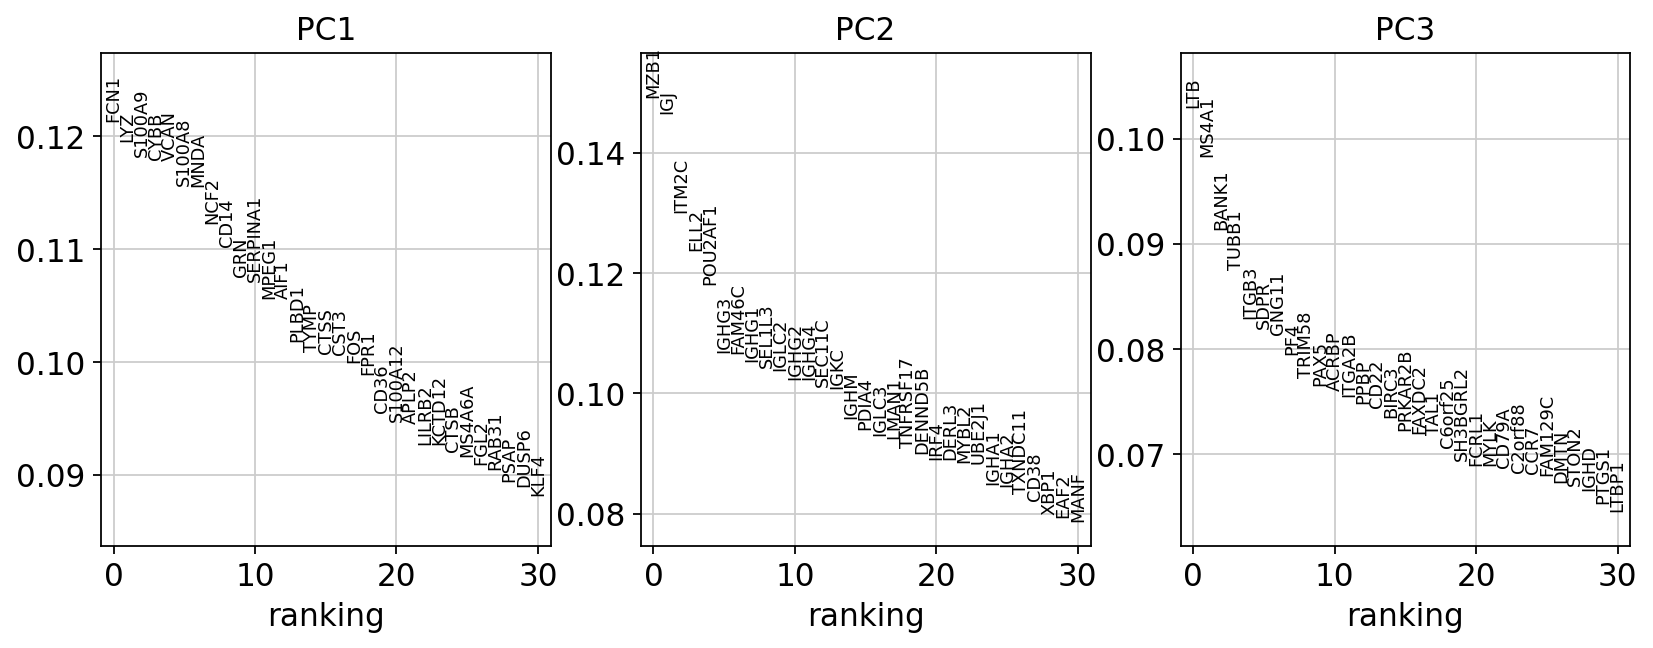

In [ ]:
sc.pl.pca_loadings(adata, include_lowest=False)


## Compute and embed neighborhood graph

In [ ]:
# valculate neighborhood graph
sc.pp.neighbors(adata)

# make umap
sc.tl.umap(adata)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:58)


## Cluster the neighborhood graph

running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:10)


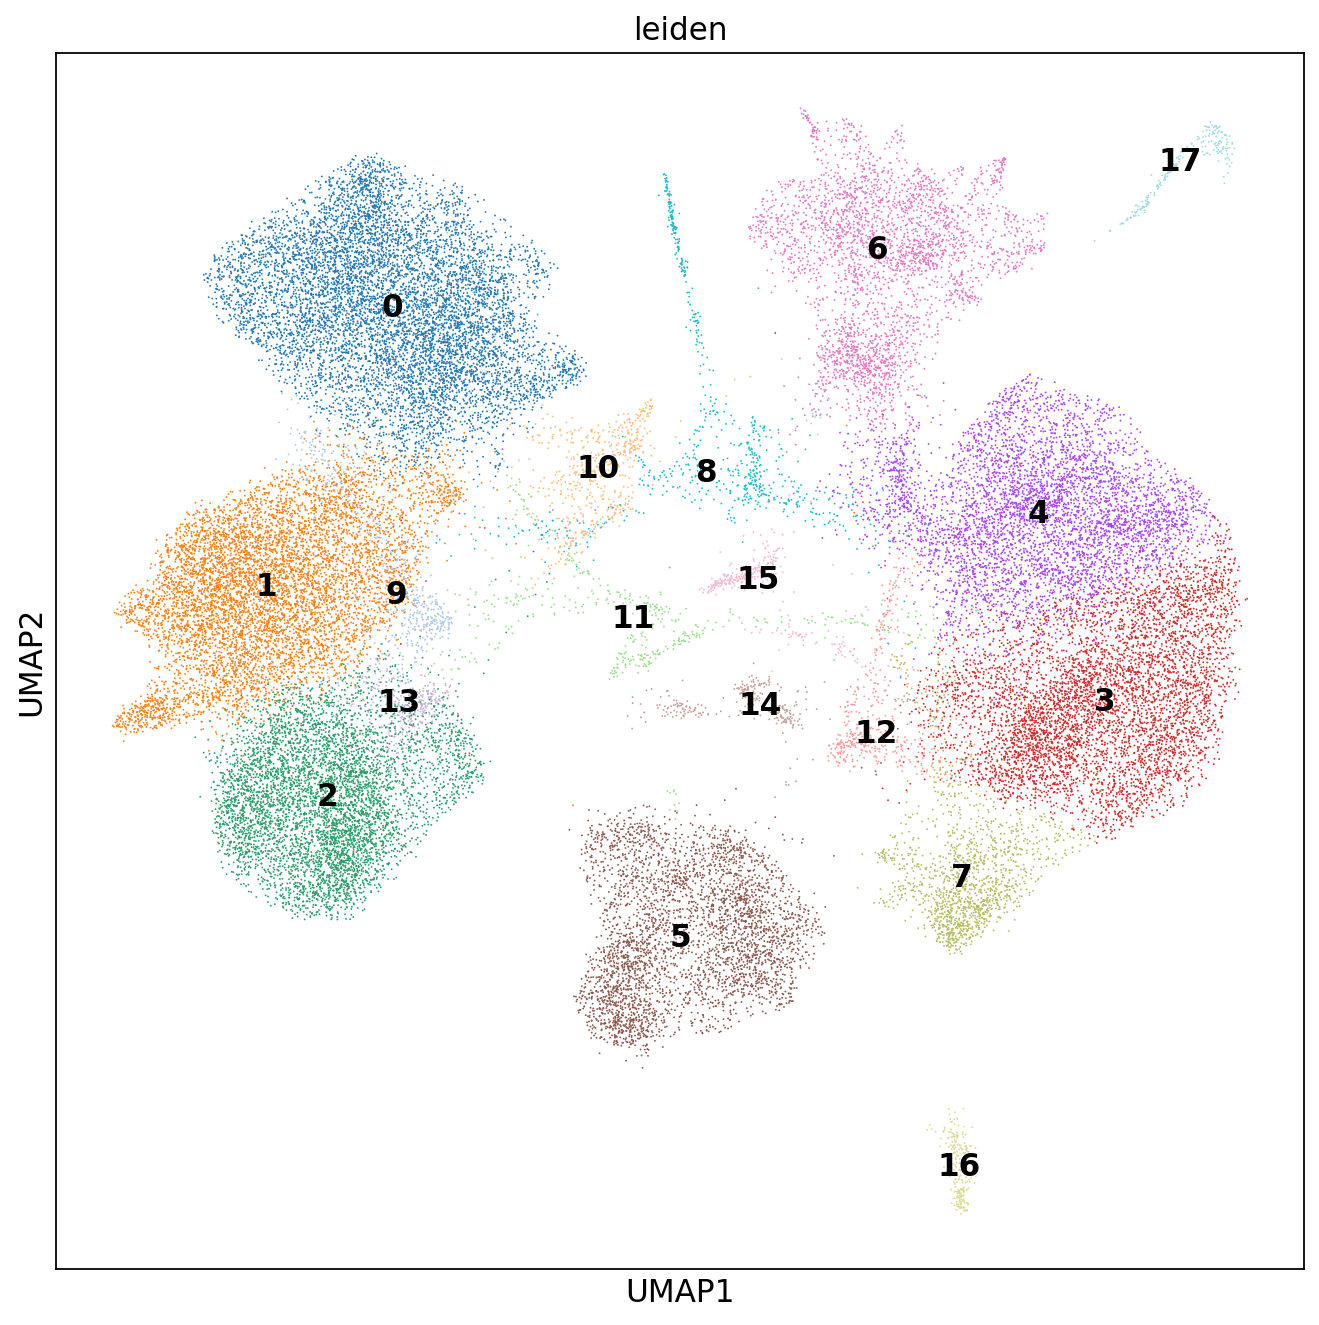

In [ ]:
# lets use Leiden clustering
sc.tl.leiden(adata, resolution=0.7)
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data')



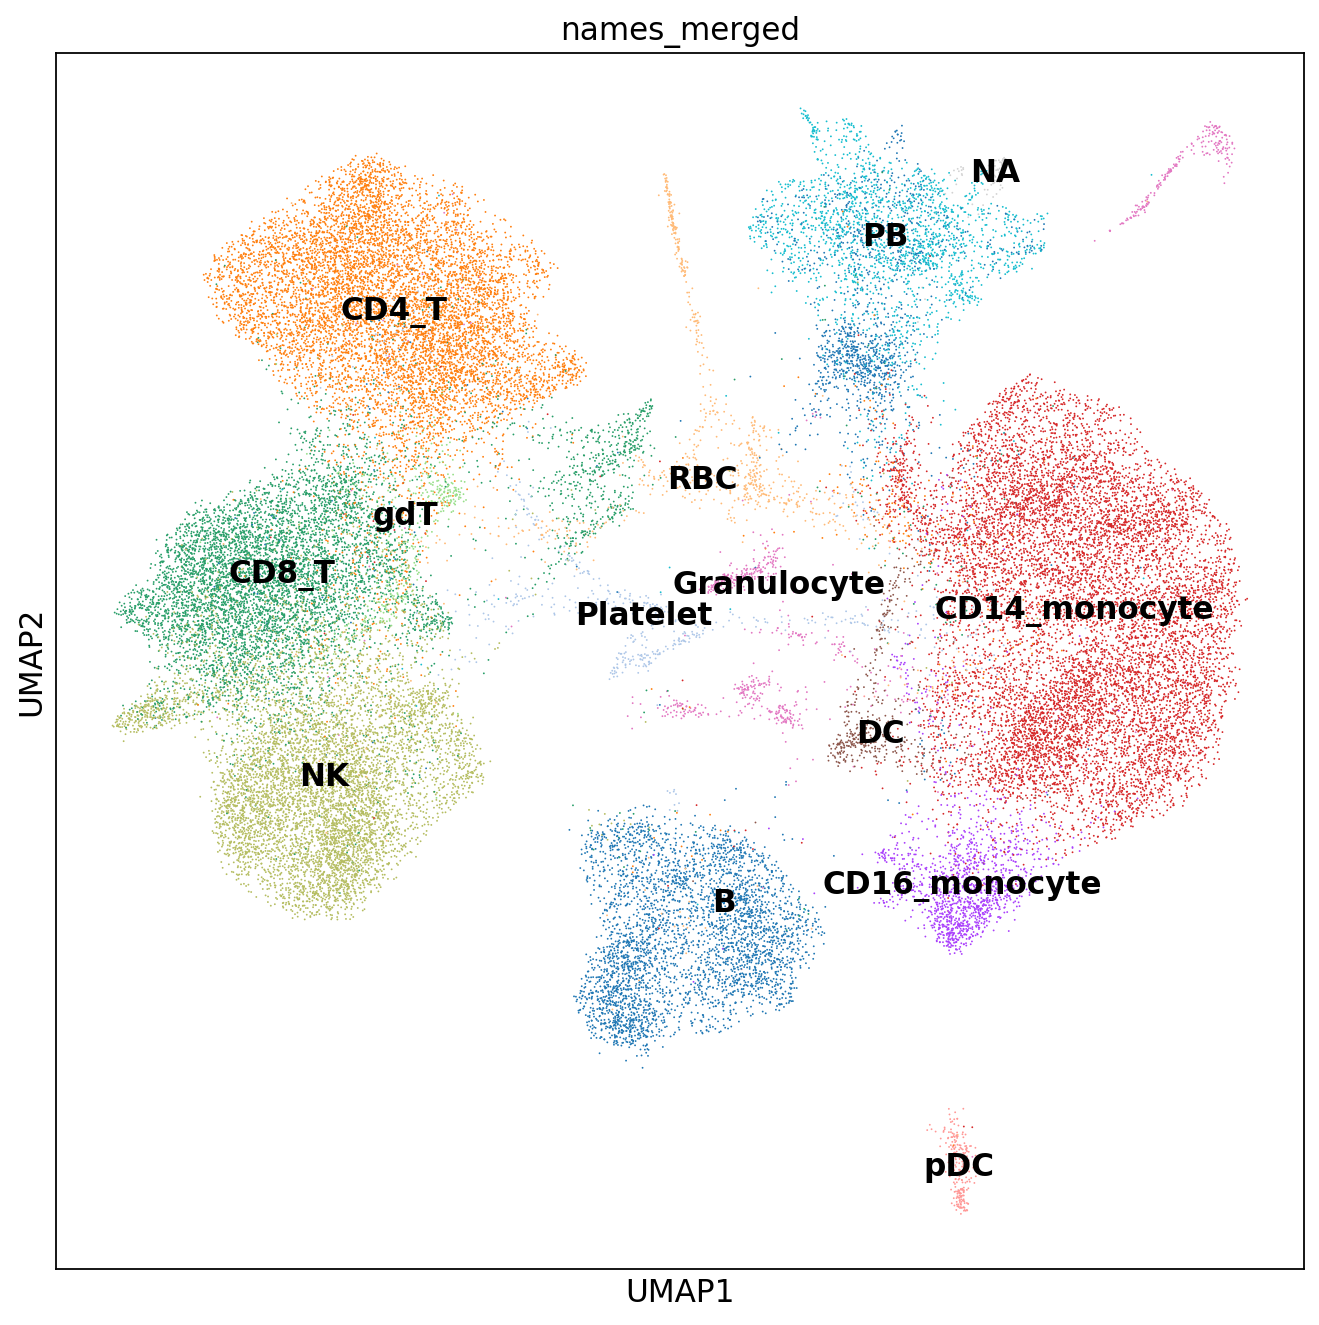

In [ ]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='names_merged', legend_loc='on data')


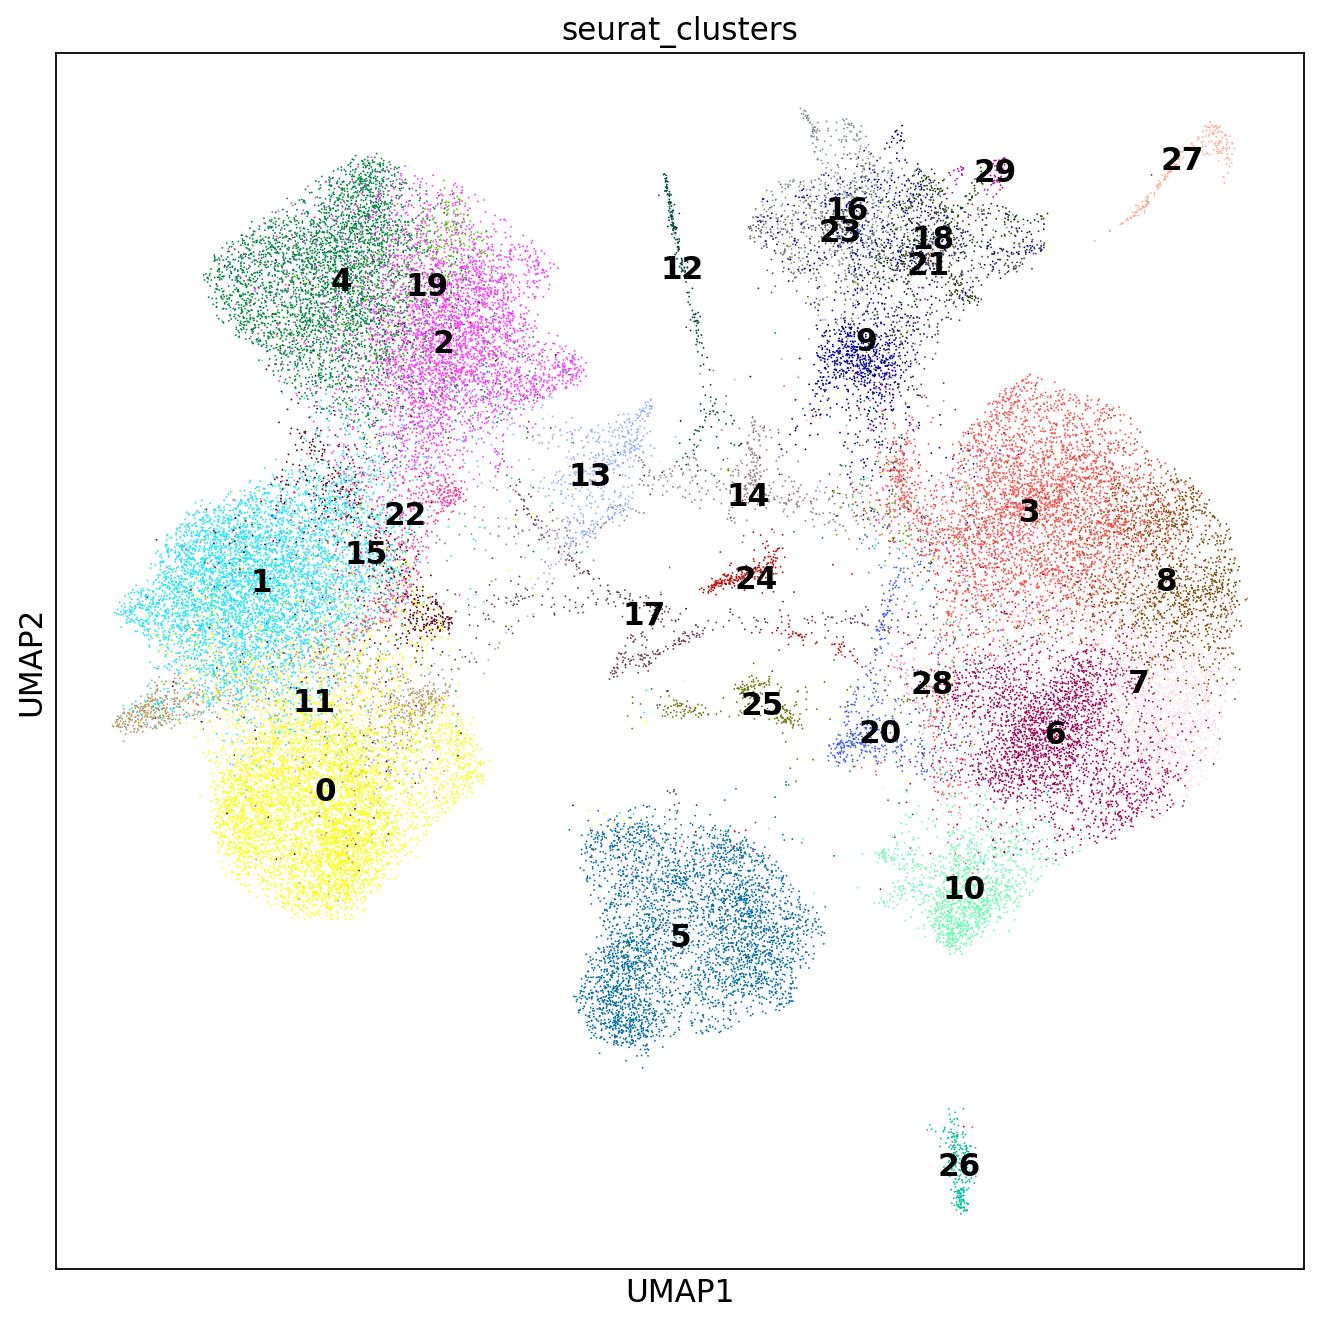

In [ ]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='seurat_clusters', legend_loc='on data')


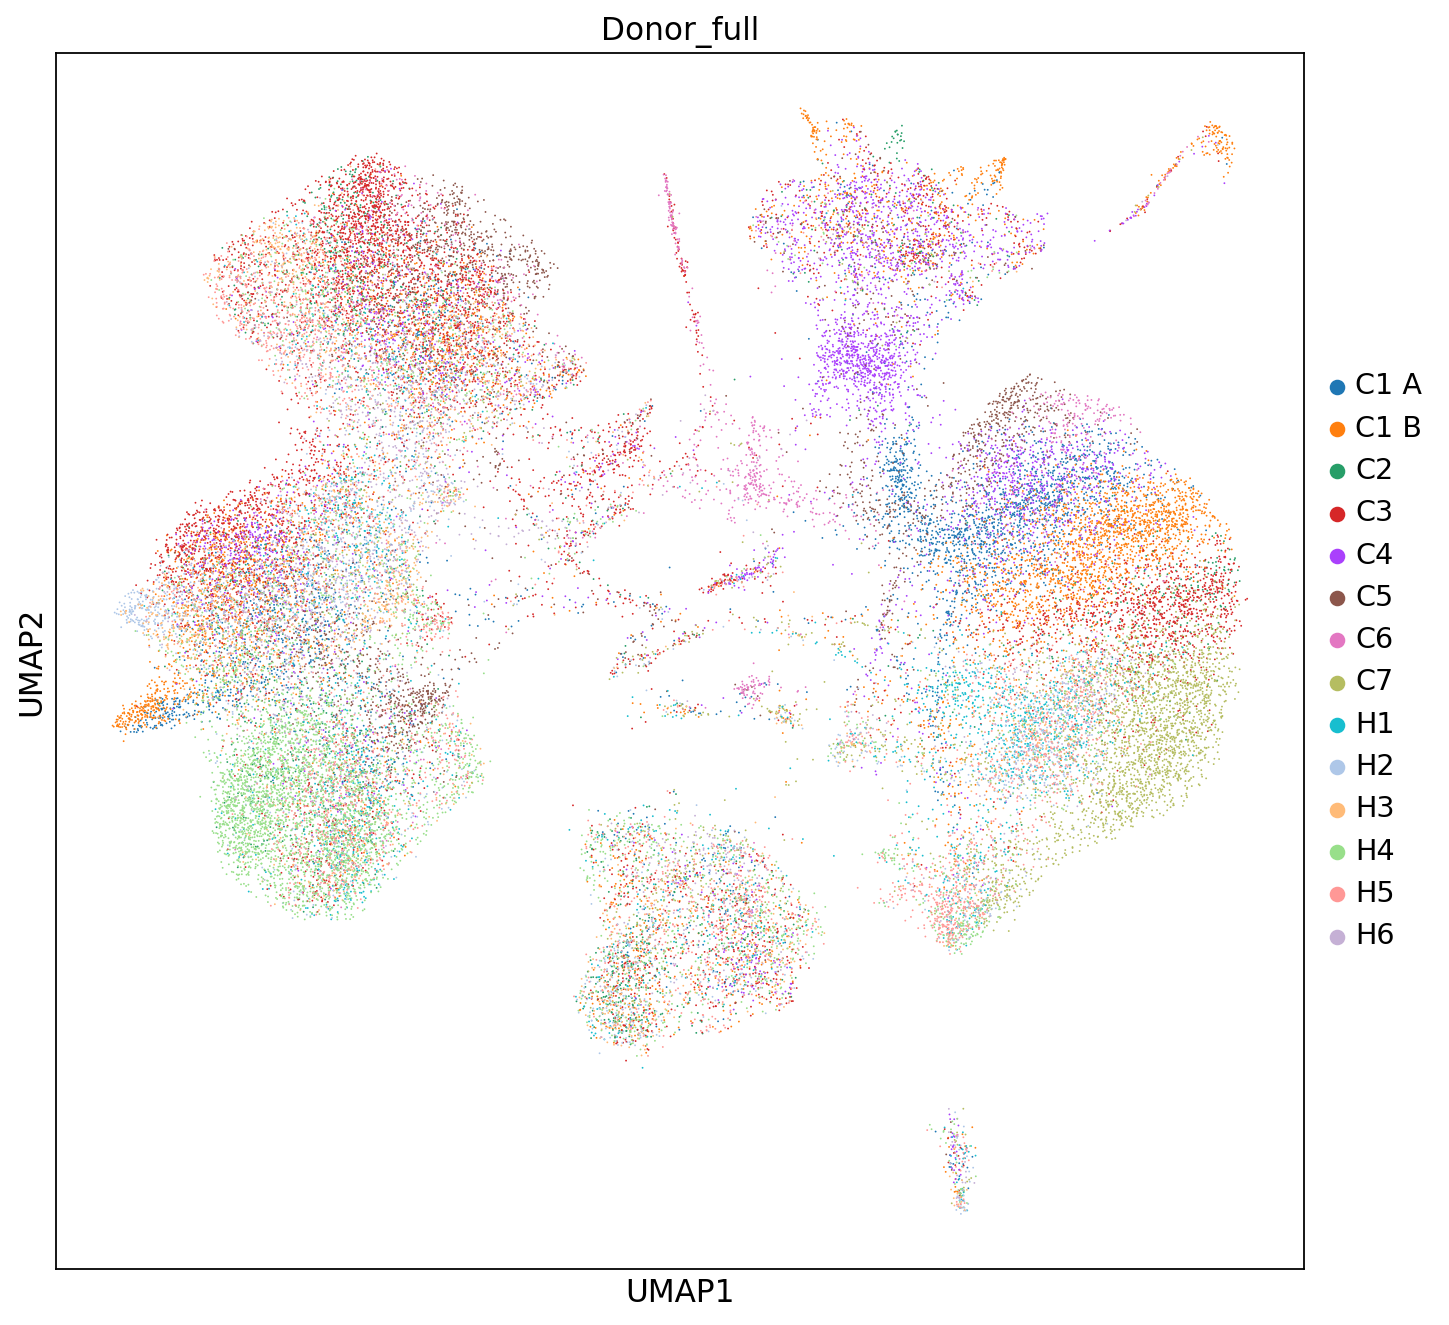

In [ ]:
# plot by sample id
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='Donor_full')


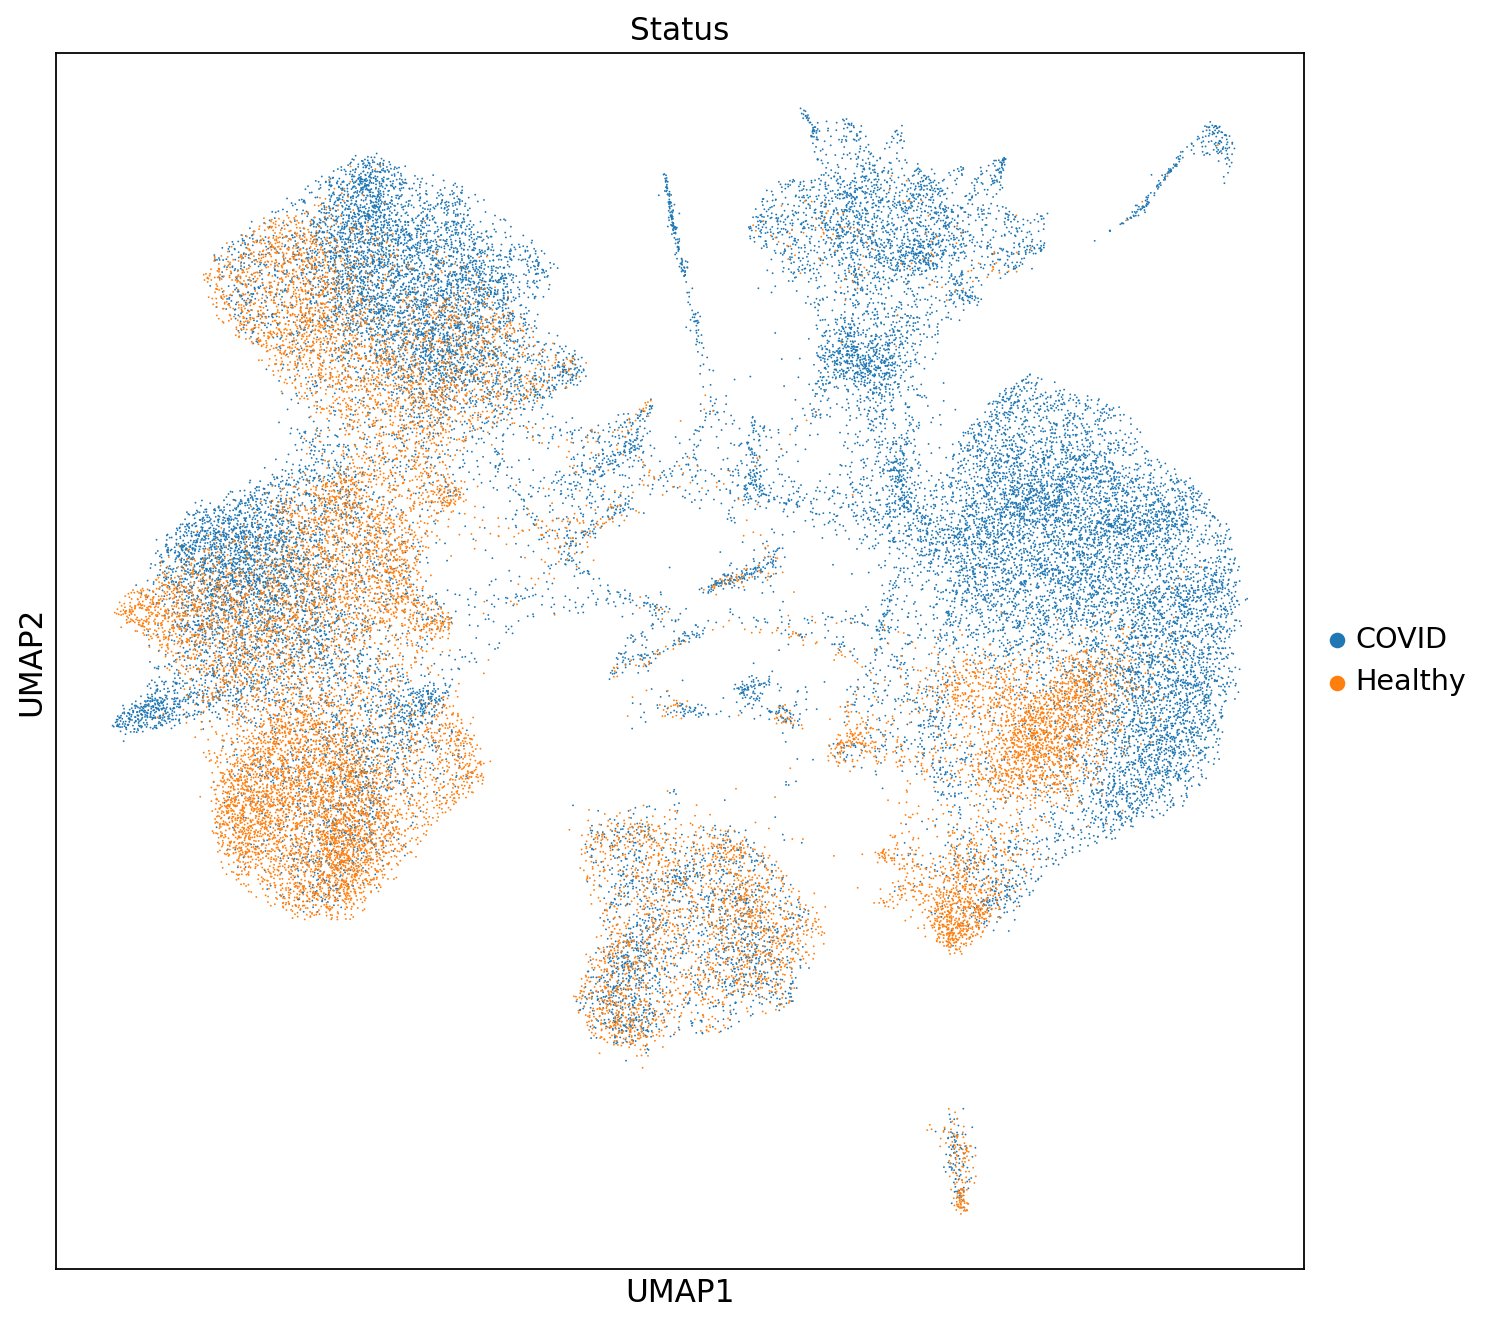

In [ ]:
# plot by stimulation
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='Status')
